In [1]:
import matplotlib.pyplot as plt        # to plot any graph
# matplotlib setup
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (6, 6)      # setting default size of plots

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn import preprocessing

from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),

]

In [39]:
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

In [40]:
def encode(train, test):
    le = LabelEncoder().fit(train.species)
    labels = le.transform(train.species)
    classes = list(le.classes_)
    test_ids = test.id

    train = train.drop(['species', 'id'], axis=1)
    test = test.drop(['id'], axis=1)

    return train, labels, test, test_ids, classes

def get_data():
    train = pd.read_csv('./data/train.csv')
    test = pd.read_csv('./data/test.csv')
    train, labels, test, test_ids, classes = encode(train, test)
    return train, labels, test, test_ids, classes

def model_selection():
    train, labels, test, test_ids, classes = get_data()
    n_samples = len(train)

    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
    for train_index, val_index in sss.split(np.zeros(n_samples), labels):
        X_train, X_val = train.values[train_index], train.values[val_index]
        y_train, y_val = labels[train_index], labels[val_index]

        X_train = preprocessing.scale(X_train)
        X_val = preprocessing.scale(X_val)

    for clf in classifiers:
        clf.fit(X_train, y_train)
        name = clf.__class__.__name__

        print("="*30)
        print(name)

        print('****Results****')
        train_predictions = clf.predict(X_val)
        acc = accuracy_score(y_val, train_predictions)
        print("Accuracy: {:.4%}".format(acc))

        prob_predictions = clf.predict_proba(X_val)
        l1 = log_loss(y_val, prob_predictions)
        print("Log Loss: {}".format(l1))
        
        log_entry = pd.DataFrame([[name, acc*100, l1]], columns=log_cols)
        global log 
        log = log.append(log_entry)

    print("="*30)


In [42]:
model_selection()

KNeighborsClassifier
****Results****
Accuracy: 98.4848%
Log Loss: 0.0975752178626
SVC
****Results****
Accuracy: 98.9899%
Log Loss: 4.64707157306
NuSVC
****Results****
Accuracy: 99.4949%
Log Loss: 2.36630719708
DecisionTreeClassifier
****Results****
Accuracy: 66.1616%
Log Loss: 11.6873637296
RandomForestClassifier
****Results****
Accuracy: 89.8990%
Log Loss: 0.971776449077
AdaBoostClassifier
****Results****
Accuracy: 4.5455%
Log Loss: 4.03577921421
GradientBoostingClassifier
****Results****
Accuracy: 58.0808%
Log Loss: 2.96324773778
GaussianNB
****Results****
Accuracy: 3.0303%
Log Loss: 33.4921468072
LinearDiscriminantAnalysis
****Results****
Accuracy: 98.9899%
Log Loss: 0.880529186439
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 2.0202%
Log Loss: 33.8410233364


In [43]:
log

,Classifier,Accuracy,Log Loss
0,KNeighborsClassifier,98.484848,0.097575
0,SVC,98.989899,4.647072
0,NuSVC,99.494949,2.366307
0,DecisionTreeClassifier,66.161616,11.687364
0,RandomForestClassifier,89.898990,0.971776
0,AdaBoostClassifier,4.545455,4.035779
0,GradientBoostingClassifier,58.080808,2.963248
0,GaussianNB,3.030303,33.492147
0,LinearDiscriminantAnalysis,98.989899,0.880529
0,QuadraticDiscriminantAnalysis,2.020202,33.841023


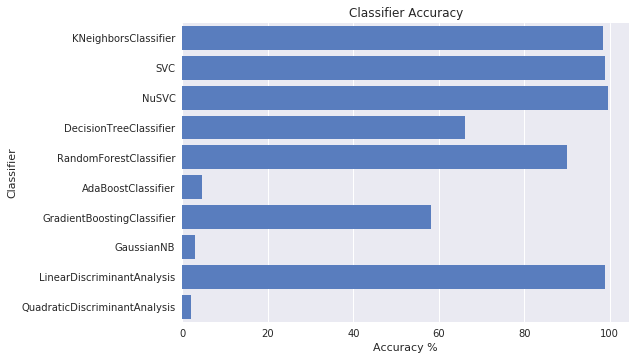

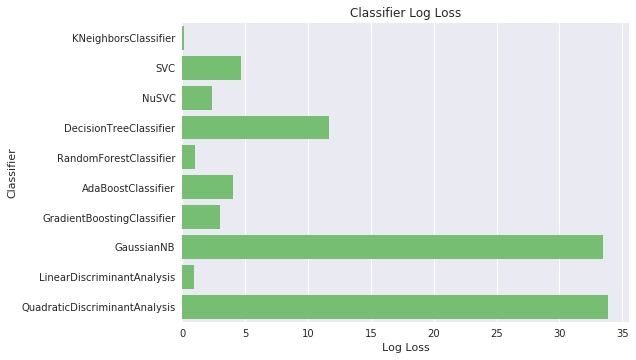

In [44]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [ ]:
def submission():
    favorite_clf = KNeighborsClassifier()
    train, labels, test, test_ids, classes = get_data()
    X_train = train.values
    y_train = labels
    favorite_clf.fit(X_train, y_train)

    test_predictions = favorite_clf.predict_proba(test)
    submission = pd.DataFrame(test_predictions, columns=classes)
    submission.insert(0, 'id', test_ids)
    submission.reset_index()

    submission.to_csv('submission.csv', index = False)
